In [10]:
import tensorflow as tf
print(tf.__version__)

2.5.0


# Introduction to Neural Networks for Regression (Outcome is 1)


*   How much or How many????
*   ML algo needs input in form of numbers. strings are needed to be one hot encoded or label encoded.


## Typical architecture of a regresison neural network

The word *typical* is on purpose.

Why?

Because there are many different ways (actually, there's almost an infinite number of ways) to write neural networks.

But the following is a generic setup for ingesting a collection of numbers, finding patterns in them and then outputing some kind of target number.

Yes, the previous sentence is vague but we'll see this in action shortly.

| **Hyperparameter** | **Typical value** |
| --- | --- |
| Input layer shape | Same shape as number of features (e.g. 3 for # bedrooms, # bathrooms, # car spaces in housing price prediction) |
| Hidden layer(s) | Problem specific, minimum = 1, maximum = unlimited |
| Neurons per hidden layer | Problem specific, generally 10 to 100 |
| Output layer shape | Same shape as desired prediction shape (e.g. 1 for house price) |
| Hidden activation | Usually [ReLU](https://www.kaggle.com/dansbecker/rectified-linear-units-relu-in-deep-learning) (rectified linear unit) |
| Output activation | None, ReLU, logistic/tanh |
| Loss function | [MSE](https://en.wikipedia.org/wiki/Mean_squared_error) (mean square error) or [MAE](https://en.wikipedia.org/wiki/Mean_absolute_error) (mean absolute error)/Huber (combination of MAE/MSE) if outliers |
| Optimizer | [SGD](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD) (stochastic gradient descent), [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) |

***Table 1:*** *Typical architecture of a regression network.* ***Source:*** *Adapted from page 293 of [Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow Book by Aurélien Géron](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/)*

Again, if you're new to neural networks and deep learning in general, much of the above table won't make sense. But don't worry, we'll be getting hands-on with all of it soon.

> 🔑 **Note:** A **hyperparameter** in machine learning is something a data analyst or developer can set themselves, where as a **parameter** usually describes something a model learns on its own (a value not explicitly set by an analyst).

Okay, enough talk, let's get started writing code.

To use TensorFlow, we'll import it as the common alias `tf` (short for TensorFlow).

## Creating data to view and fit

In [11]:
import numpy as np
import matplotlib.pyplot as plt

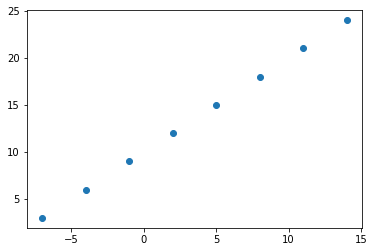

In [12]:
# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);

## Input and Output 


*  The input shape is the shape of your data that goes into the model.

*  The output shape is the shape of your data you want to come out of your model.



In [13]:
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

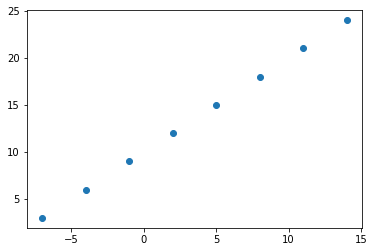

In [14]:
plt.scatter(X,y)

In [15]:
X = tf.cast(tf.constant(X),dtype = 'float32')
y = tf.cast(tf.constant(y),dtype = 'float32')


In [16]:
# Take a single example of X
input_shape = X[0].shape 

# Take a single example of y
output_shape = y[0].shape

input_shape, output_shape # these are both scalars (no shape)

(TensorShape([]), TensorShape([]))

## Steps in modelling

Now we know what data we have as well as the input and output shapes, let's see how we'd build a neural network to model it.

In TensorFlow, there are typically 3 fundamental steps to creating and training a model.

1. **Creating a model** - piece together the layers of a neural network yourself (using the [Functional](https://www.tensorflow.org/guide/keras/functional) or [Sequential API](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential)) or import a previously built model (known as transfer learning).
2. **Compiling a model** - defining how a models performance should be measured (loss/metrics) as well as defining how it should improve (optimizer). 
3. **Fitting a model** - letting the model try to find patterns in the data (how does `X` get to `y`). 

Let's see these in action using the [Keras Sequential API](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential) to build a model for our regression data. And then we'll step through each.


In [17]:
#set random seed
tf.random.set_seed(40)

# 1. create the model using keras library in tensorflow
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. compile the model 
model.compile(loss = 'mae', # Mean absolute error
              optimizer = 'sgd', # Stochastic Gradient Descent
              metrics = ['mae'])

# 3. fir the model 
model.fit(X,y,epochs = 5)

Epoch 1/5
1/1 [==============================] - 0s 237ms/step - loss: 12.9528 - mae: 12.9528
Epoch 2/5
1/1 [==============================] - 0s 5ms/step - loss: 12.8203 - mae: 12.8203
Epoch 3/5
1/1 [==============================] - 0s 6ms/step - loss: 12.6878 - mae: 12.6878
Epoch 4/5
1/1 [==============================] - 0s 3ms/step - loss: 12.5553 - mae: 12.5553
Epoch 5/5
1/1 [==============================] - 0s 4ms/step - loss: 12.4228 - mae: 12.4228


In [18]:
y_pred = model.predict([17.0])
y_pred

array([[5.6827435]], dtype=float32)

## Improving a model

How do you think you'd improve upon our current model?

If you guessed by tweaking some of the things we did above, you'd be correct.

To improve our model, we alter almost every part of the 3 steps we went through before.

1. **Creating a model** - here you might want to add more layers, increase the number of hidden units (also called neurons) within each layer, change the activation functions of each layer.
2. **Compiling a model** - you might want to choose optimization function or perhaps change the **learning rate** of the optimization function.
3. **Fitting a model** - perhaps you could fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).

Woah. We just introduced a bunch of possible steps. The important thing to remember is how you alter each of these will depend on the problem you're working on.

And the good thing is, over the next few problems, we'll get hands-on with all of them.

For now, let's keep it simple, all we'll do is train our model for longer (everything else will stay the same).

In [39]:
#increasing the number of epochs

# 1. creating the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compiling the model 
model.compile(loss='mae',
              optimizer = 'sgd',
              metrics = ['mae'])

# 3. fit the model
model.fit(X,y,epochs = 100)

Epoch 1/100
1/1 [==============================] - 0s 241ms/step - loss: 14.1314 - mae: 14.1314
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 13.9989 - mae: 13.9989
Epoch 3/100
1/1 [==============================] - 0s 4ms/step - loss: 13.8664 - mae: 13.8664
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 13.7339 - mae: 13.7339
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 13.6014 - mae: 13.6014
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 13.4689 - mae: 13.4689
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 13.3364 - mae: 13.3364
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 13.2039 - mae: 13.2039
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 13.0714 - mae: 13.0714
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 12.9389 - mae: 12.9389
Epoch 11/100
1/1 [==============================] - 0s 4

In [40]:
#predict the value
y_pred = model.predict([17])
y_pred



array([[29.948065]], dtype=float32)

**Still not that accurate even after increasing the epochs**

In [44]:
#Adding a hidden layer with 100 units else to make the model run more accurately

# 1. creating the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. compiling the model 
model.compile(loss = tf.losses.mae,
             optimizer = 'sgd',
             metrics = ['mae'])
# 3. fitting the model
model.fit(X, y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 0s 279ms/step - loss: 13.4021 - mae: 13.4021
Epoch 2/100
1/1 [==============================] - 0s 6ms/step - loss: 12.7844 - mae: 12.7844
Epoch 3/100
1/1 [==============================] - 0s 7ms/step - loss: 12.1620 - mae: 12.1620
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 11.5427 - mae: 11.5427
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 10.9128 - mae: 10.9128
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 10.2700 - mae: 10.2700
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 9.6009 - mae: 9.6009
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 8.8986 - mae: 8.8986
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 8.1603 - mae: 8.1603
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 7.3741 - mae: 7.3741
Epoch 11/100
1/1 [==============================] - 0s 4ms/step -

In [45]:
#predicting the value
y_pred1  = model.predict([17.0])
y_pred1

array([[31.262754]], dtype=float32)

**though the mae is small still its not working as good as the earlier model this can be due to OVERFITTING**

###Common Ways to Improve the model
*  Adding Layers
*  Increase the number of hidden units 
*  Change the activation functions
*  Change the optimization functions
*  Change the learning rate
*  Fitting more data
*  Fitting for longer


In [49]:
#Adding a hidden layer with 100 units else to make the model run more accurately

# 1. creating the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50,activation=None),
    tf.keras.layers.Dense(1)
])

# 2. compiling the model 
model.compile(loss = tf.losses.mae,
             optimizer = tf.optimizers.Adam(learning_rate= 0.01),
             metrics = ['mae'])
# 3. fitting the model
model.fit(X, y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 0s 315ms/step - loss: 12.5844 - mae: 12.5844
Epoch 2/100
1/1 [==============================] - 0s 6ms/step - loss: 11.7738 - mae: 11.7738
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 10.9602 - mae: 10.9602
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 10.1433 - mae: 10.1433
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 9.3223 - mae: 9.3223
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 8.4962 - mae: 8.4962
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 7.6630 - mae: 7.6630
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 6.8807 - mae: 6.8807
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 6.8787 - mae: 6.8787
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 7.1630 - mae: 7.1630
Epoch 11/100
1/1 [==============================] - 0s 6ms/step - los

In [50]:
#prediciton time
y_pred2 = model.predict([17])
y_pred2

array([[27.020494]], dtype=float32)

**The most accurate model of the three**

## Evaluating a model 

A typical workflow you'll go through when building neural networks is:

```
Build a model -> evaluate it -> build (tweak) a model -> evaulate it -> build (tweak) a model -> evaluate it...
```

The tweaking comes from maybe not building a model from scratch but adjusting an existing one.

*Visualize, visualize, visualize*

When it comes to evaluation, you'll want to remember the words: "visualize, visualize, visualize." 

This is because you're probably better looking at something (doing) than you are thinking about something.

It's a good idea to visualize:
* **The data** - what data are you working with? What does it look like?
* **The model itself** - what does the architecture look like? What are the different shapes?
* **The training of a model** - how does a model perform while it learns?
* **The predictions of a model** - how do the predictions of a model line up against the ground truth (the original labels)?

Let's start by visualizing the model.

But first, we'll create a little bit of a bigger dataset and a new model we can use (it'll be the same as before, but the more practice the better).


In [51]:
#Making a bigger dataset for the model

X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [52]:
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

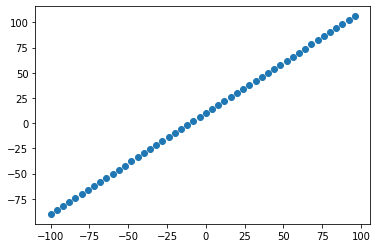

In [53]:
import matplotlib.pyplot as plt
plt.scatter(X,y)

### Split data into training/test set

One of the other most common and important steps in a machine learning project is creating a training and test set (and when required, a validation set).

Each set serves a specific purpose:
* **Training set** - the model learns from this data, which is typically 70-80% of the total data available (like the course materials you study during the semester).
* **Validation set** - the model gets tuned on this data, which is typically 10-15% of the total data available (like the practice exam you take before the final exam).
* **Test set** - the model gets evaluated on this data to test what it has learned, it's typically 10-15% of the total data available (like the final exam you take at the end of the semester).

For now, we'll just use a training and test set, this means we'll have a dataset for our model to learn on as well as be evaluated on.

We can create them by splitting our `X` and `y` arrays.

> 🔑 **Note:** When dealing with real-world data, this step is typically done right at the start of a project (the test set should always be kept separate from all other data). We want our model to learn on training data and then evaluate it on test data to get an indication of how well it **generalizes** to unseen examples.

In [55]:
X_train, y_train = X[:40], y[:40]

X_test, y_test = X[40:], y[40:]

### Visualizing the data

Now we've got our training and test data, it's a good idea to visualize it.

Let's plot it with some nice colours to differentiate what's what.

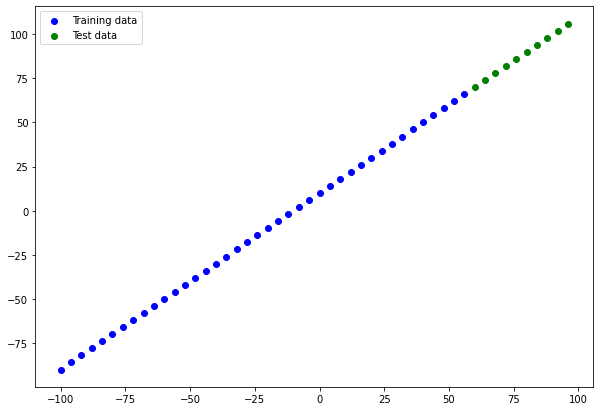

In [58]:
plt.figure(figsize=(10,7))
# Training data as blue
plt.scatter(X_train, y_train, c = "b", label = "Training data")
# Test data as green
plt.scatter(X_test, y_test, c = "g", label = "Test data")

plt.legend()

In [65]:
#Create the model for the Train data and predicting the test data.

# 1. Create model 
model  = tf.keras.Sequential([
   tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss = 'mae',
              optimizer = 'sgd',
              metrics = ['mae'])
# 3. fit the train data only
# model.fit(X_train, y_train, epochs = 100)

In [66]:
model.summary()

ValueError: ignored

In [104]:
# Let's Create a model which builds automatically by defining the input_shape argument 

# 1. Create the model by giving the input shape argument 
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50,activation=None,input_shape = [1]),
    tf.keras.layers.Dense(1)
])

# 2. compiling the model 
model.compile(loss = tf.losses.mae,
             optimizer = tf.optimizers.Adam(learning_rate= 0.01),
             metrics = ['mae'])

In [105]:
model.summary()

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 50)                100       
_________________________________________________________________
dense_34 (Dense)             (None, 1)                 51        
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


Calling `summary()` on our model shows us the layers it contains, the output shape and the number of parameters.
* **Total params** - total number of parameters in the model.
* **Trainable parameters** - these are the parameters (patterns) the model can update as it trains. (**also known as Weights and biases**)
* **Non-trainable parameters** - these parameters aren't updated during training (this is typical when you bring in the already learned patterns from other models during **transfer learning**).

> 📖 **Resource:** For a more in-depth overview of the trainable parameters within a layer, check out [MIT's introduction to deep learning video](https://youtu.be/njKP3FqW3Sk).

> 🛠 **Exercise:** Try playing around with the number of hidden units in the `Dense` layer (e.g. `Dense(2)`, `Dense(3)`). How does this change the Total/Trainable params? Investigate what's causing the change.

For now, all you need to think about these parameters is that their learnable patterns in the data.



In [106]:
#Let's fit our model to the training data.

model.fit(X_train, y_train, epochs = 100, verbose = 0)

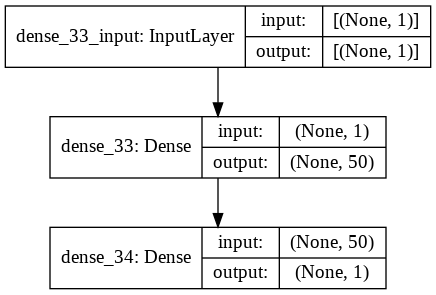

In [107]:
#plot the model 
from tensorflow.keras.utils import plot_model

plot_model(model = model,show_shapes= True)

### Visualizing the predictions

Now we've got a trained model, let's visualize some predictions.

To visualize predictions, it's always a good idea to plot them against the ground truth labels.

Often you'll see this in the form of `y_test` vs. `y_pred` (ground truth vs. predictions).

First, we'll make some predictions on the test data (`X_test`), remember the model has never seen the test data.

In [108]:
y_pred3 = model.predict(X_test)
tf.reshape(y_test,shape = (10,1)), y_pred3

(<tf.Tensor: shape=(10, 1), dtype=int32, numpy=
 array([[ 70],
        [ 74],
        [ 78],
        [ 82],
        [ 86],
        [ 90],
        [ 94],
        [ 98],
        [102],
        [106]], dtype=int32)>, array([[ 70.79411 ],
        [ 74.85652 ],
        [ 78.91892 ],
        [ 82.981316],
        [ 87.04372 ],
        [ 91.10612 ],
        [ 95.16851 ],
        [ 99.23091 ],
        [103.29331 ],
        [107.355705]], dtype=float32))

In [109]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=y_pred3):

  plt.figure(figsize=(10,7))
  plt.scatter(train_data, train_labels, c= "b", label = 'Training Set')
  plt.scatter(test_data, test_labels, c= "g",label = 'test Set', )
  plt.scatter(test_data,predictions, c= "r", label = 'predictions')
  plt.legend()

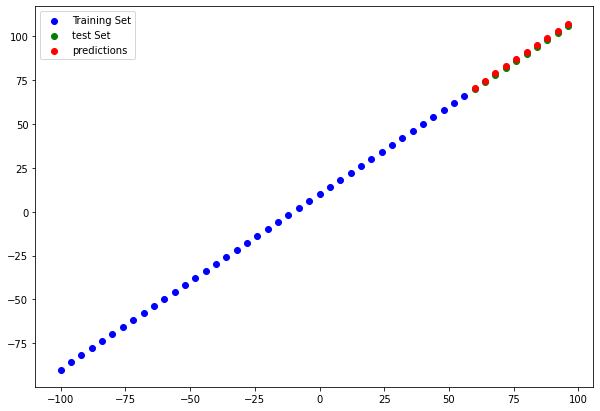

In [110]:
plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=y_pred3)

### Evaluating predictions

Alongisde visualizations, evaulation metrics are your alternative best option for evaluating your model.

Depending on the problem you're working on, different models have different evaluation metrics. 

Two of the main metrics used for regression problems are:
* **Mean absolute error (MAE)** - the mean difference between each of the predictions.
* **Mean squared error (MSE)** - the squared mean difference between of the predictions (use if larger errors are more detrimental than smaller errors).

The lower each of these values, the better.

You can also use [`model.evaluate()`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#evaluate) which will return the loss of the model as well as any metrics setup during the compile step.
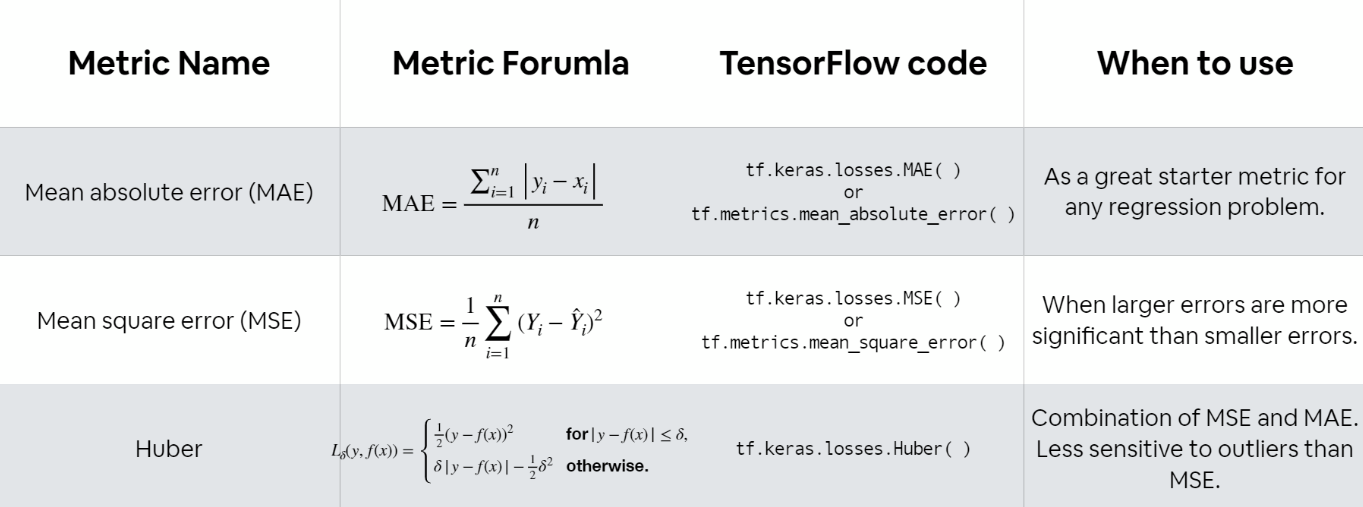